<a href="https://colab.research.google.com/github/TNH510/Artificial-Intelligence/blob/main/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.models import Sequential, Model
from keras import Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from numpy import asarray

folder = '/content/drive/MyDrive/Face Recognition/Data/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('dung'):
    output = 0
  if file.startswith('Ha'):
    output = 1
  if file.startswith('hakiet'):
    output = 2
  if file.startswith('hau'):
    output = 3
  if file.startswith('Hieu'):
    output = 4
  if file.startswith('hoaifong'):
    output = 5
  if file.startswith('Hoang'):
    output = 6
  if file.startswith('HQHuy'):
    output = 7
  if file.startswith('HuuLong'):
    output = 8
  if file.startswith('Khoa'):
    output = 9
  if file.startswith('khuong'):
    output = 10
  if file.startswith('kiet'):
    output = 11
  if file.startswith('KyAnh'):
    output = 12
  if file.startswith('Loc'):
    output = 13
  if file.startswith('Luan'):
    output = 14
  if file.startswith('minh'):
    output = 15
  if file.startswith('ngocThach'):
    output = 16
  if file.startswith('NhatHuy'):
    output = 17
  if file.startswith('NTKiet'):
    output = 18
  if file.startswith('Phat'):
    output = 19
  if file.startswith('Phuc'):
    output = 20
  if file.startswith('pqhuy'):
    output = 21
  if file.startswith('QuangPhuc'):
    output = 22
  if file.startswith('sang'):
    output = 23
  if file.startswith('SonTung'):
    output = 24
  if file.startswith('TanDat'):
    output = 25
  if file.startswith('thai'):
    output = 26
  if file.startswith('thang'):
    output = 27
  if file.startswith('thanh'):
    output = 28
  if file.startswith('Thao'):
    output = 29
  if file.startswith('Thinh'):
    output = 30
  if file.startswith('tien'):
    output = 31
  if file.startswith('TLoc'):
    output = 32
  if file.startswith('Trong'):
    output = 33
  if file.startswith('Van'):
    output = 34
  if file.startswith('VuThach'):
    output = 35
  photo = load_img(folder + file, target_size=(40, 40))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/Face Recognition/Face_photos.npy', photos)
save('/content/drive/MyDrive/Face Recognition/Face_labels.npy', labels)

(2107, 40, 40, 3) (2107,)


In [ ]:
# Load images and labels
from keras.utils import to_categorical #one hot encoding
photos = np.load('/content/drive/MyDrive/Face Recognition/Face_photos.npy')
labels = np.load('/content/drive/MyDrive/Face Recognition/Face_labels.npy')
labels_one_hot = to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(photos, labels_one_hot, test_size = 0.3, random_state = 100)

In [ ]:
model = Sequential()
#Convolutional
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', input_shape = (40,40,3), padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(1024, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(36, activation= 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 40, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        3

In [ ]:
#Tang cuong data
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")

In [ ]:
train = model.fit_generator(aug.flow(x_train, y_train, batch_size=64),
                               epochs=100,
                               validation_data=aug.flow(x_test,y_test,
                               batch_size=len(x_test)))

<ipython-input-7-408fd8c73c5d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train = model.fit_generator(aug.flow(x_train, y_train, batch_size=64),


Epoch 1/100
24/24 [==============================] - 15s 244ms/step - loss: 3.5855 - accuracy: 0.0265 - val_loss: 3.5841 - val_accuracy: 0.0158
Epoch 2/100
24/24 [==============================] - 2s 91ms/step - loss: 3.5739 - accuracy: 0.0305 - val_loss: 3.5878 - val_accuracy: 0.0205
Epoch 3/100
24/24 [==============================] - 2s 91ms/step - loss: 3.4941 - accuracy: 0.0387 - val_loss: 3.4676 - val_accuracy: 0.0458
Epoch 4/100
24/24 [==============================] - 2s 90ms/step - loss: 3.2997 - accuracy: 0.0855 - val_loss: 3.2853 - val_accuracy: 0.0537
Epoch 5/100
24/24 [==============================] - 2s 90ms/step - loss: 3.1208 - accuracy: 0.1187 - val_loss: 3.0106 - val_accuracy: 0.1374
Epoch 6/100
24/24 [==============================] - 3s 125ms/step - loss: 2.7755 - accuracy: 0.1974 - val_loss: 2.4422 - val_accuracy: 0.2986
Epoch 7/100
24/24 [==============================] - 2s 89ms/step - loss: 2.3383 - accuracy: 0.2965 - val_loss: 2.1156 - val_accuracy: 0.3965
Epo

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy:", test_acc)
print('Loss:', test_loss)
model.save('/content/drive/MyDrive/Face Recognition/Face.h5')

20/20 [==============================] - 0s 14ms/step - loss: 45.4153 - accuracy: 0.8720
Accuracy: 0.8720378875732422
Loss: 45.415279388427734


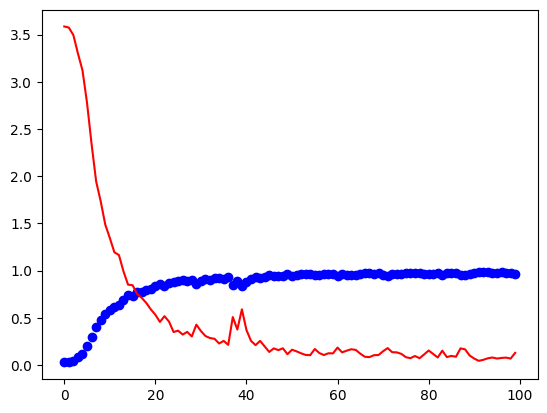

In [ ]:
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()


In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Face Recognition/Face.h5')

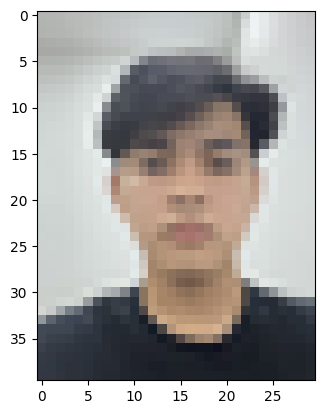

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
import numpy as np

from PIL import Image

#Hiển thị ảnh tải lên
img_original = Image.open('/content/drive/MyDrive/Face Recognition/Checking data/minh.png')
plt.imshow(img_original)


1/1 [==============================] - 0s 21ms/step
[15]


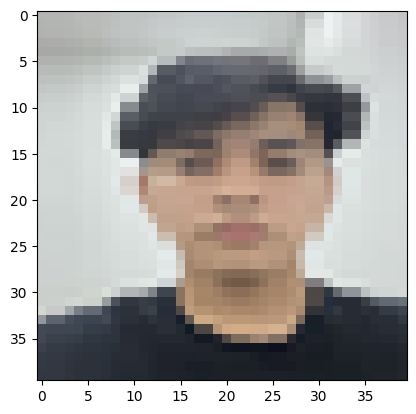

In [ ]:
url = '/content/drive/MyDrive/Face Recognition/Checking data/minh.png'
img = load_img(url, target_size= (40,40,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,40,40,3)
img = img.astype('float32')/255

#Dự đoán ảnh đã tải lên
import numpy as np
max = np.argmax(model.predict(img), axis = 1)
print(max)